# Data Analysis of Diabetes Dataset

## Data Cleaning

In [1]:
# Import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected=True)
cf.go_offline()

### Description of data
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

 - **Pregnancies**: This column tells us how many times a patient has been pregnant.
 - **Glucose**: This column measures the patient's blood sugar level after consuming glucose.
 - **BloodPressure**: This column represents the patient's blood pressure reading, specifically the pressure in the arteries when the heart is at rest. (mm Hg)
 - **SkinThickness**: This column indicates the thickness of the skinfold on the triceps (mm).
 - **Insulin**: This column shows the level of insulin in the patient's blood after a 2-hour period. ((mu U/ml))
 - **BMI**: This column represents the patient's Body Mass Index, which is a measure of body fat based on height and weight.
 - **DiabetesPedigreeFunction**: This column measures the patient's likelihood of having diabetes based on their family history of the disease.
 - **Age**: This column tells us the age of the patient in years.
 - **Outcome**: This column indicates whether the patient has diabetes or not. A value of 1 means they have diabetes, while 0 means they don't.

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [5]:
df = diabetes.copy()

In [6]:
# let us find out information about data
df.shape

(768, 9)

In [7]:
df.info()
# No null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
56,7,187,68,39,304,37.7,0.254,41,1
564,0,91,80,0,0,32.4,0.601,27,0
679,2,101,58,17,265,24.2,0.614,23,0
624,2,108,64,0,0,30.8,0.158,21,0
682,0,95,64,39,105,44.6,0.366,22,0
255,1,113,64,35,0,33.6,0.543,21,1
102,0,125,96,0,0,22.5,0.262,21,0
432,1,80,74,11,60,30.0,0.527,22,0
418,1,83,68,0,0,18.2,0.624,27,0
309,2,124,68,28,205,32.9,0.875,30,1


In [9]:
df.duplicated().sum() 

0

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df.corr().iplot(kind='heatmap',
               colorscale='Blues')

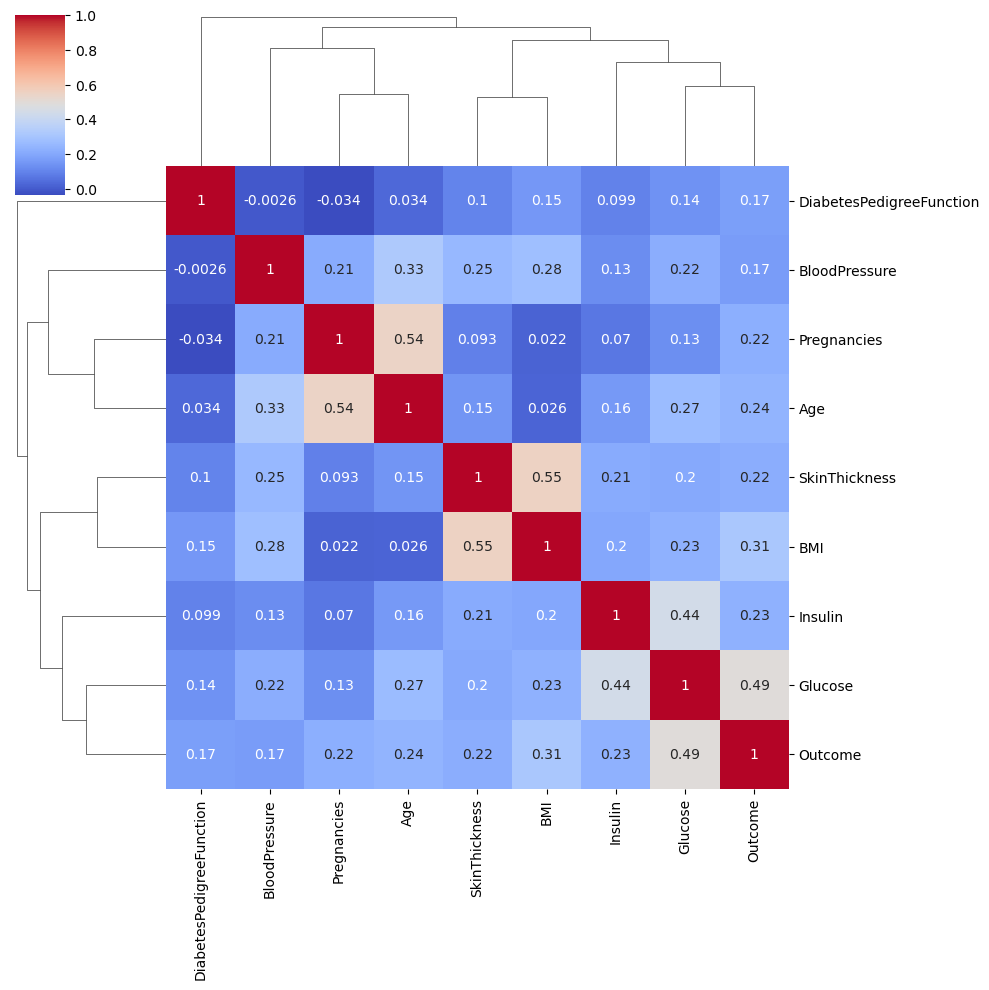

In [27]:
sns.clustermap(data = df.corr(),annot=True,cmap='coolwarm')

    -> All columns are numerical
    -> Age of female and number of times a female is pregnant are moderate positively correlated (which is obvious)
    -> Glucose and Outcome are positively correlated (which may be indicator that glucose is highly contributing in having  diabetes)
    -> BMI and SkinThickness are positively correlated (which is obvious as SkinThickness is responsible in BMI)

In [11]:
a = []
for i in df.columns:
    a.append(df[df[i]==0].shape[0])
pd.Series(a,index=df.columns)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Problems idenified with the data are given below**

  -  Glucose, BloodPressure, SkinThickness, Insulin, BMI columns have values zero which is not possible. May be null values were replaced with zeros
     - Glucose column has **5** rows with zero values   
     - BloodPressure column has **35** rows with zero values
     - SkinThickness column has **227** rows with zero values
     - Insulin column has **374** rows with zero values
     - BMI column has **11** rows with zero values


In [17]:
from fancyimpute import IterativeImputer

# Select the columns with zeros
columns_with_zeros = ['Insulin', 'SkinThickness','BloodPressure']

# Replace zeros with NaN
df[columns_with_zeros] = df[columns_with_zeros].replace(0, float('nan'))

# Perform MICE imputation
imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df[columns_with_zeros]), columns=columns_with_zeros)

# Update the original DataFrame with the imputed values
df[columns_with_zeros] = df_imputed.astype('int64')

In [18]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0,int(df['Glucose'].mean()))

In [19]:
pd.DataFrame(data = [diabetes.mean(),df.mean()],index = ['Before Imputation','After Imputation'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Before Imputation,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
After Imputation,3.845052,121.675781,72.384115,29.175781,156.592448,32.450805,0.471876,33.240885,0.348958


## Univariate Analysis

### Checking the distribution of Outcome variable

In [20]:
outcome_cnt = df.groupby(by=["Outcome"]).count()[["BMI"]].rename(columns={"BMI":"Count"}).reset_index()
outcome_cnt

,Outcome,Count
0,0,500
1,1,268


In [21]:
outcome_cnt.iplot(kind="pie",
                labels="Outcome",
                values="Count",
                textinfo='percent+label',hole=.4,title='Outcome Distribution')

### Checking The distribution of Independent Varibles

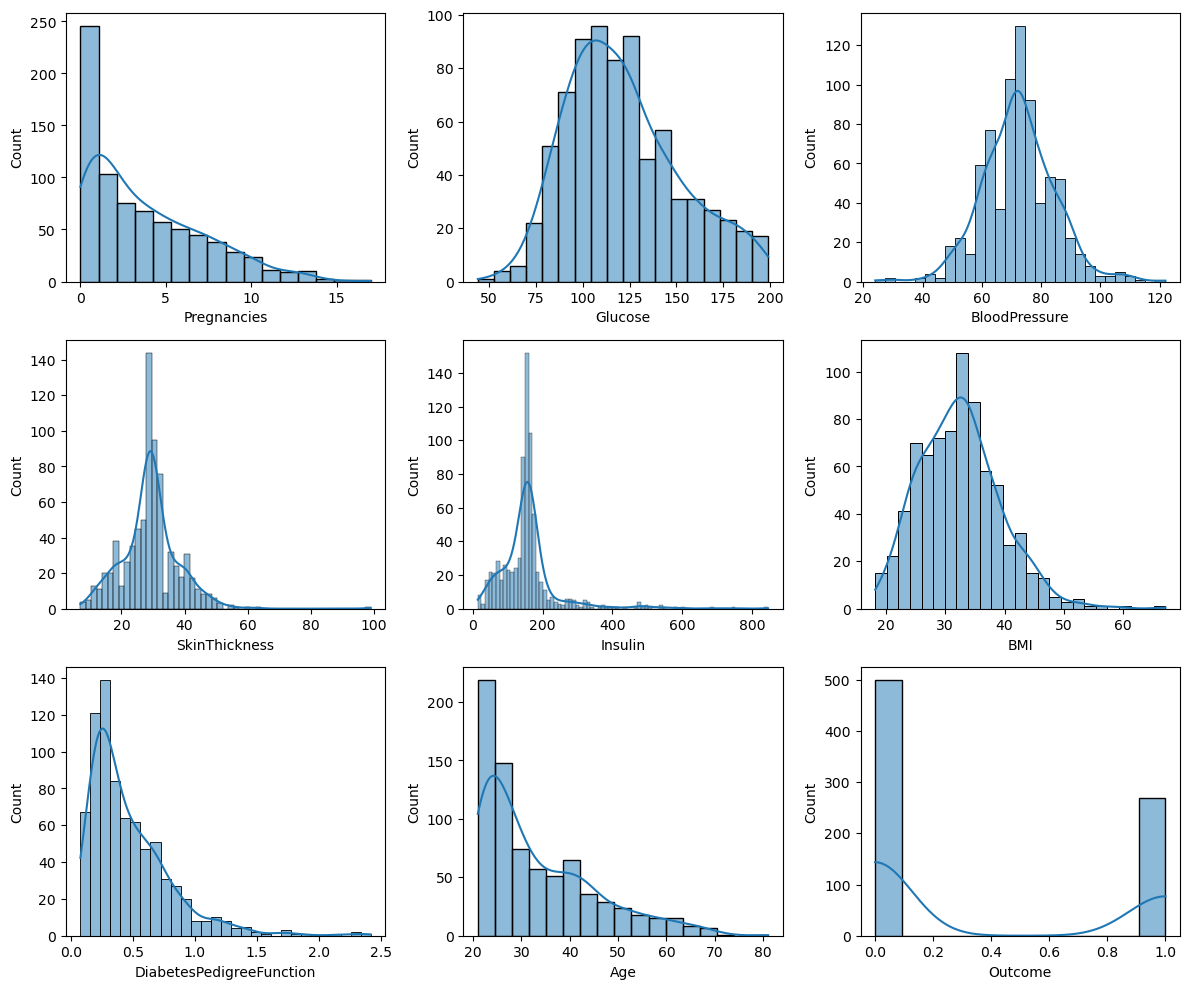

In [23]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column and corresponding axis
for i, (col, ax) in enumerate(zip(df.columns, axes)):
    # Plot the histogram for the current column using seaborn
    sns.histplot(data=df, x=col, ax=ax,kde=True)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

    -> There are more number of females from 20 to 30 age group in the dataset
    -> Glucose histogram shows normal distribution
    -> The SkinThickness 99 is exceptional and is outlier in the dataset
    -> Insulin column has outliers in range 700 to 800 (but it is possible to have that insulin level so cannot be removed)

## To find Outliers

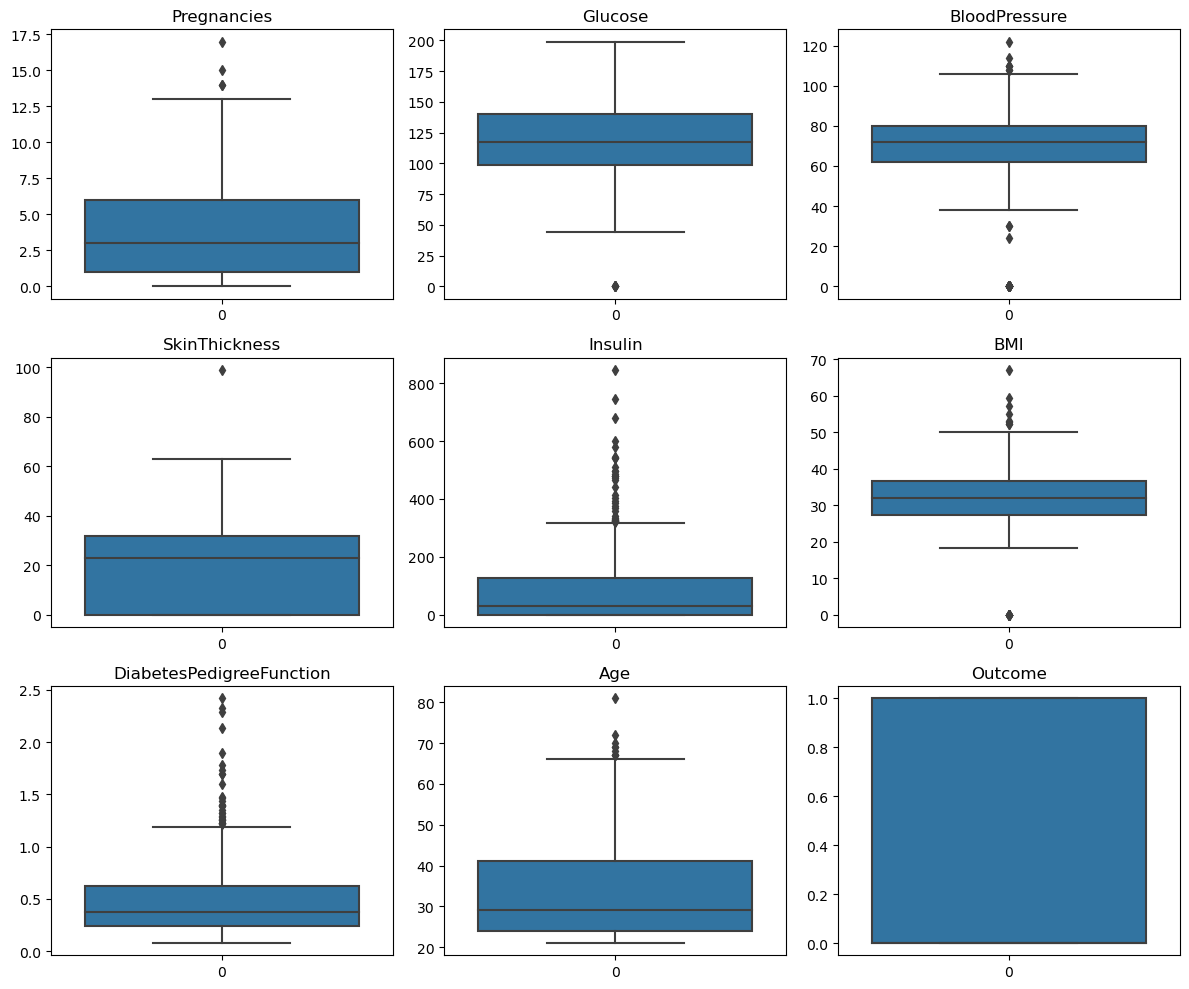

In [11]:

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column and corresponding axis
for i, (col, ax) in enumerate(zip(df.columns, axes)):
    # Plot the boxplot for the current column using seaborn
    sns.boxplot(data=df[col], ax=ax)
    ax.set_title(col)  # Set the title as the column name

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


    -> Since all outliers are possible to have, we cannot remove them

## Bivariate Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_10844\3198713461.py:10: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



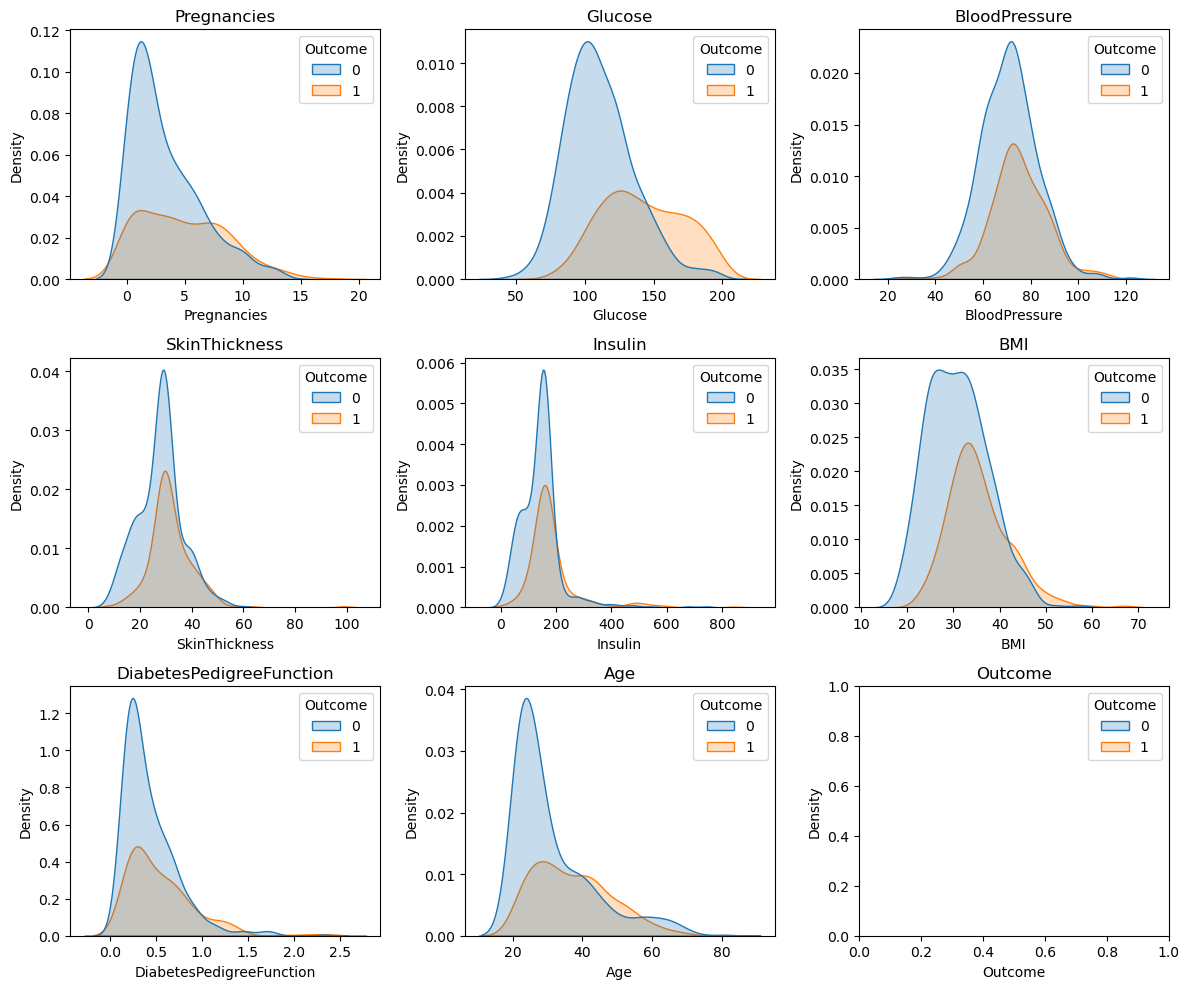

In [24]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column and corresponding axis
for i, (col, ax) in enumerate(zip(df.columns, axes)):
    # Plot the KDE plot for the current column using seaborn with 'hue' parameter
    sns.kdeplot(data=df, x=col, hue='Outcome', fill=True, ax=ax)
    ax.set_title(col)  # Set the title as the column name

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

    -> There is very high chance of not diagnosing diabetes if the **age** is under **40**
    -> Having blood **pressure** level below **110** decreases the likelihood of having diabetes.
    -> Females with **glucose** levels below **140 mg/dL** have a lower probability of being diagnosed with diabetes.
    -> Females with **insulin** level below **60 mg/dL** have a lower probability of being diagnosed with diabetes.
    -> Females with **SkinThickness** below **25 mm** have a lower probability of being diagnosed with diabetes
    -> **BMI** greater than **40** increases the probability of liklihood of having diabetes

<Figure size 2000x1500 with 0 Axes>

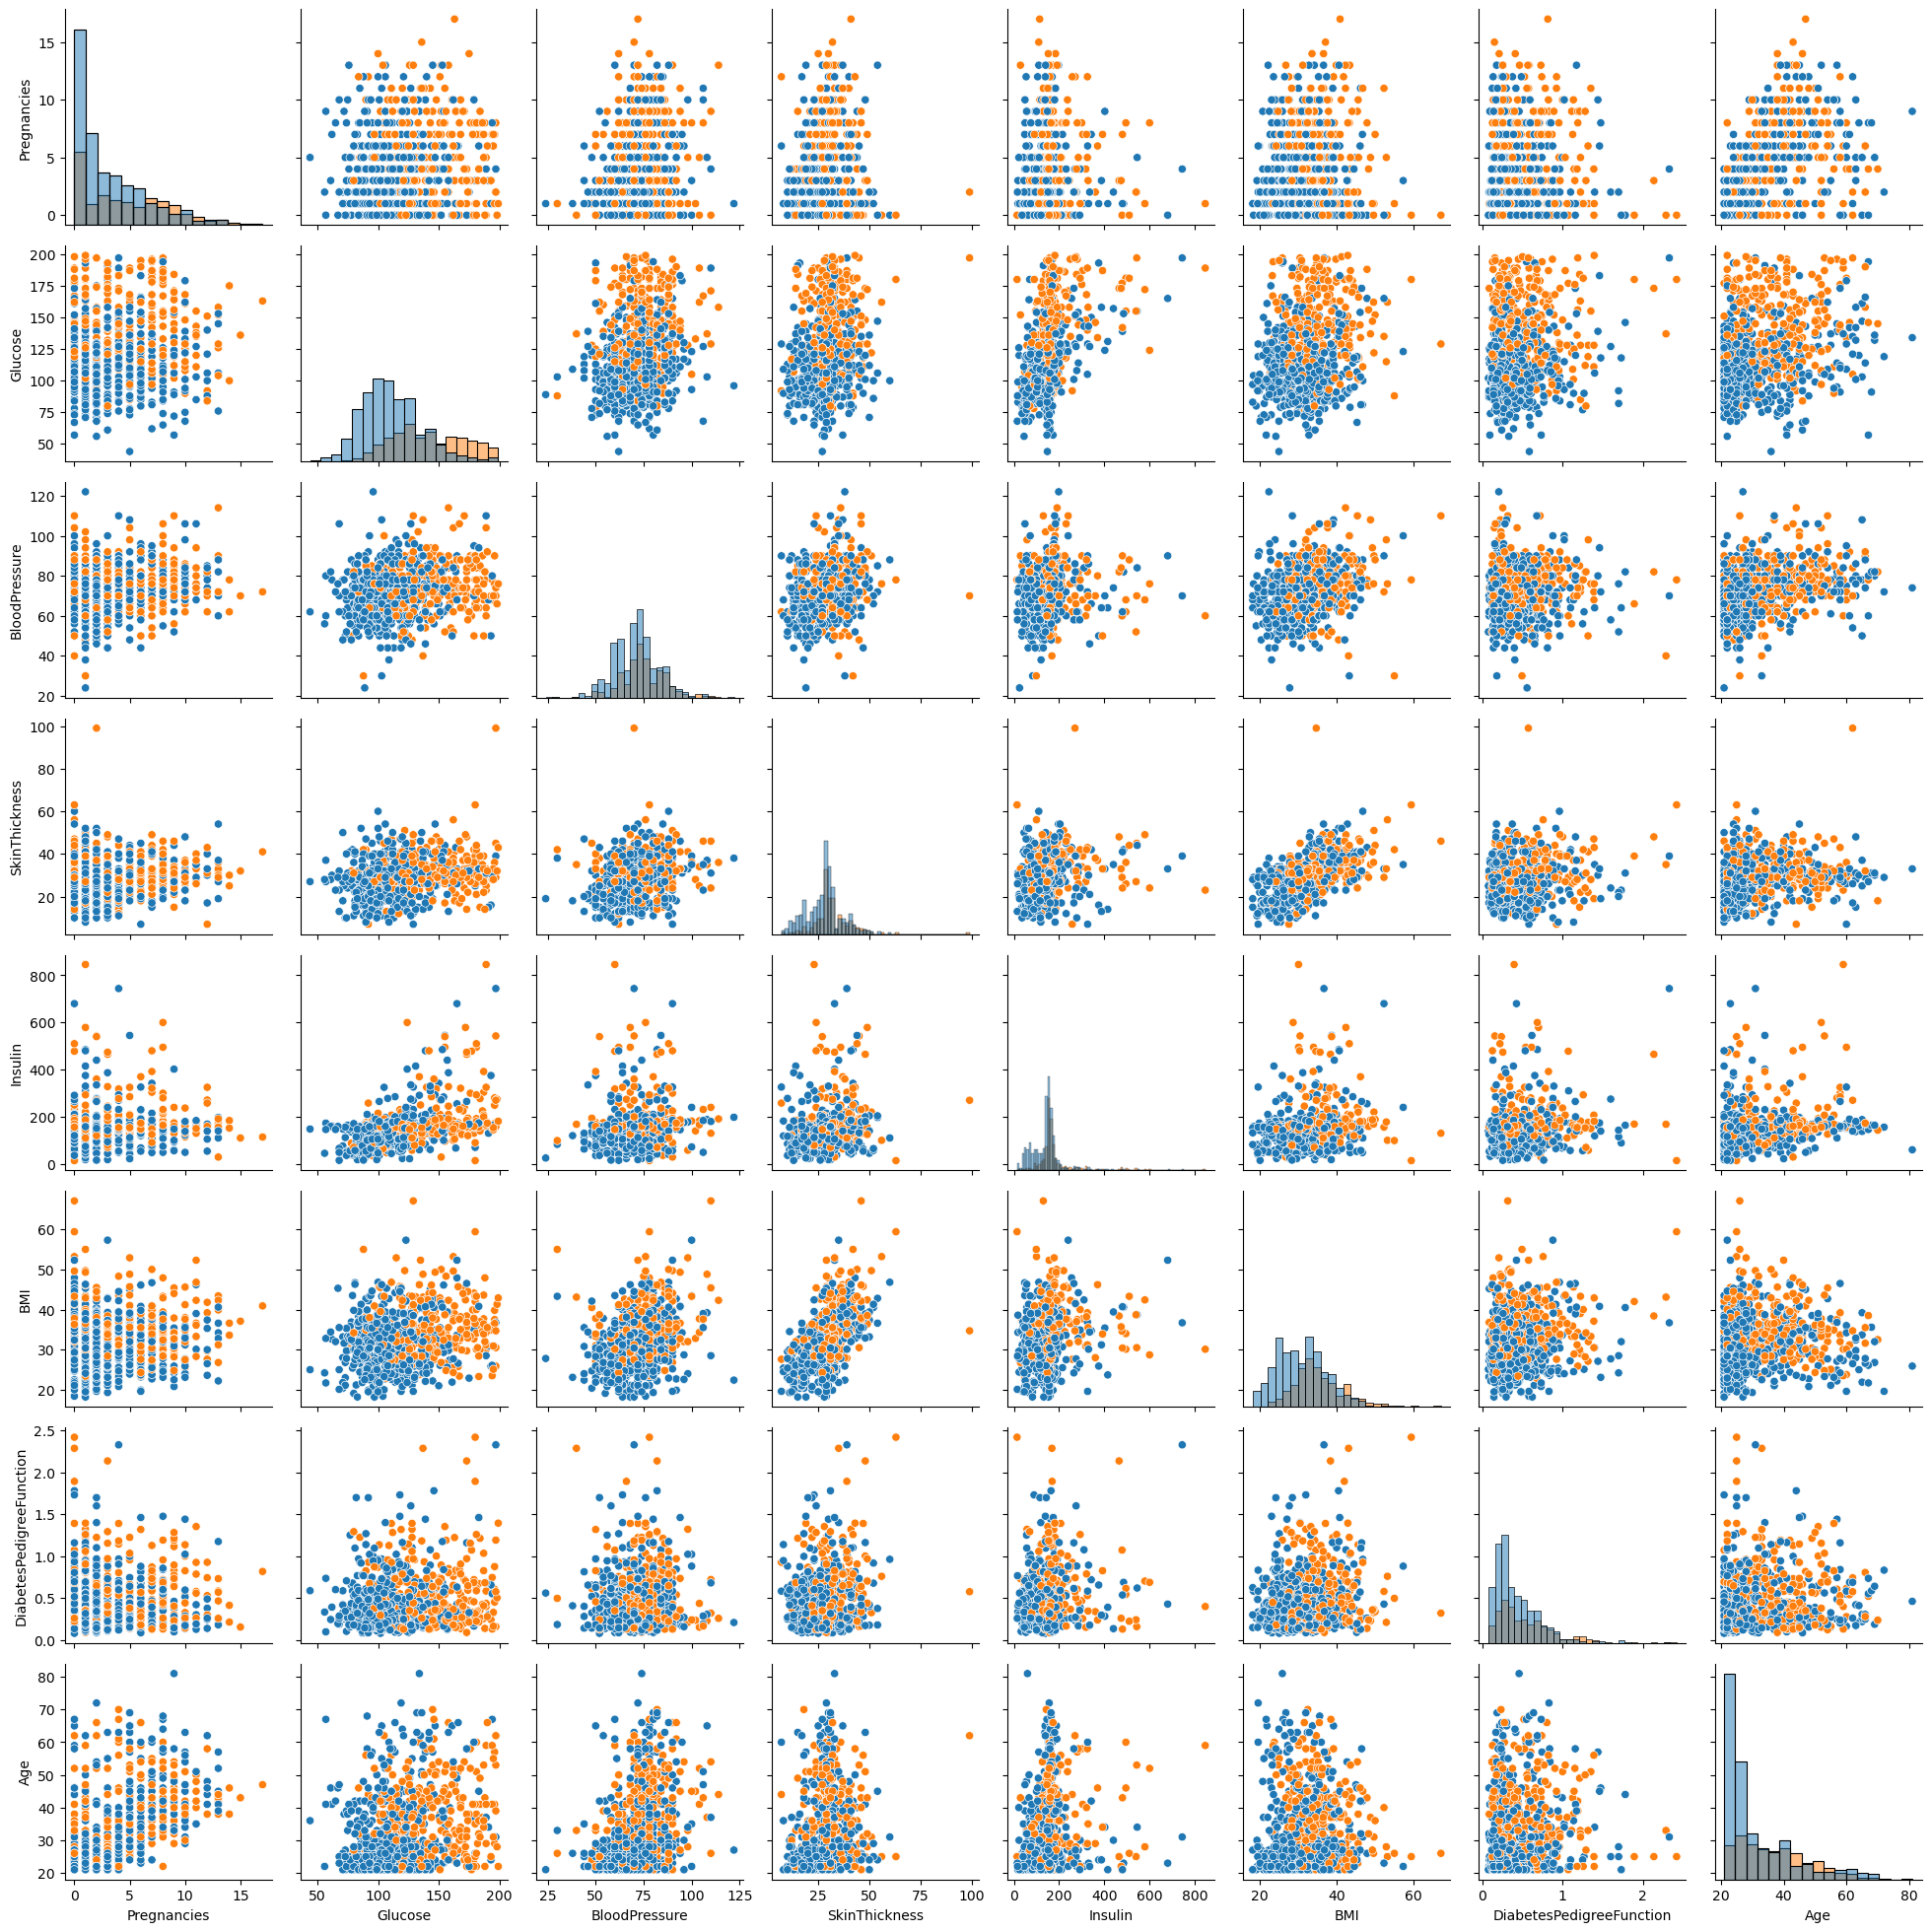

In [26]:
plt.figure(figsize=(20,15))
g = sns.PairGrid(data = df,hue='Outcome')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

    -> From above gridplot we can see that, Glucose, BMI, Age are the most important features contibute in analysis

From the analysis, we can conclude following points:
 - **Pregnancies**: The number of pregnancies does not contribute in diagnosis of diabetes.
 - **Glucose**: After consuming glucose, a normal blood sugar level is below **140 mg/dL**
 - **BloodPressure**: The normal range for blood pressure when the heart is at rest is below **120 mmHg**
 - **SkinThickness**: The normal range for skinfold thickness on the triceps is less than **25 mm**.
 - **Insulin**: After a 2-hour period, normal insulin levels are below **30 µU/mL**
 - **BMI**: The normal range of BMI is 18.5 to 30. The people with greater than **30 BMI** are suffering with obesity which contibutes in diabetes.

**Higher levels of Glucose, BMI and DiabetesPedigreeFunction majorly increase the possibility of having Diabetes**